# **Dataset Selection and Preliminary Research**

I have selected the Cars4U dataset from a public data repository, Kaggle.
This dataset contains detailed information about used cars, including their
**bold text**make, model, year of manufacture, kilometers driven, fuel type, transmission
type, owner history, mileage, engine capacity, power output, seating capacity,
and price. It include 7253 rows and 14 columns These information can help us to analyze the factors value of used
car by looking for pattern affect car pricing such as vehicle age, fuel type,
transmission mode, and mileage

**Potential questions to explore include:**

How does the number of kilometers driven affect the resale price of a car?

What is the relationship between engine power and the selling price?

Do automatic transmission cars have a higher resale value than manual ones?

How does fuel type influence car prices?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import pandas and reading Dataset
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/AIG/ML_Project/used_cars_data.csv')

# Print out first 5 rows of dataset
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


**Analyzing the Data**

In [6]:
data.shape

(7253, 14)

my dataset having 7253 entries and 14 columns

In [7]:
# show the data type and information about data include columns and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Making a copy to avoid working on orginal dataset

In [8]:
data1= data.copy()

Drop columns S.No irrelavant information

In [9]:
data1.drop(columns=['S.No.'], inplace=True)


**Checking missing value**

In [10]:
data1.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,46


The dataset contains missing values, particularly in the 'New_Price' column, which has 6,247 missing entries. Since this column may not provide much useful information, it should be dropped."

**Check the percentage of missing values in the 'New_Price' column relative to all entries**

In [11]:
percentage = (data1['New_Price'].isnull().sum() / data1.shape[0]) * 100
print(f"{percentage:.2f}%")

86.13%


Since 86.13% of the values in the 'New_Price' column are missing, the column provides little useful information and should be dropped

In [12]:
data1.drop(columns=["New_Price"], inplace=True)

Missing values in 'Price' were filled with the mean for consistency, while missing 'Seats' values were set to a minimum of 2 to ensure realistic assumptions

In [13]:
# missing value in Price replace in mean
price_mean=data1['Price'].mean()
data1["Price"] = data["Price"].fillna(price_mean)
data1["Seats"] = data["Seats"].fillna(2)


Missing values in 'Mileage', 'Engine', and 'Power' were filled with 'Unknown' to maintain data completeness and ensure consistency in categorical representation

In [14]:
# Fill unknown in Mileague , Engine and Power
data1["Mileage"] = data["Mileage"].fillna("Unknown")
data1["Engine"] = data["Engine"].fillna("Unknown")
data1["Power"] = data["Power"].fillna("Unknown")

In [15]:
# data.dtypes
data1.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0
Power,0


All missing values have been handled, and we now have a clean dataset with no missing entries, ensuring consistency for further analysis

**Data Type Fixes**

In [16]:
data1.dtypes

,0
Name,object
Location,object
Year,int64
Kilometers_Driven,int64
Fuel_Type,object
Transmission,object
Owner_Type,object
Mileage,object
Engine,object
Power,object


Extracted and retained only numeric values from 'Mileage', 'Engine', and 'Power' columns, converting them to float for numerical analysis

In [17]:
# Convert 'Mileage', 'Engine', and 'Power' to numeric values
data1['Mileage'] = data1['Mileage'].str.extract('([\d.]+)').astype(float)
data1['Engine'] = data1['Engine'].str.extract(r'([\d.]+)').astype(float)
data1['Power'] = data1['Power'].str.extract(r'([\d.]+)').astype(float)


**Handling Outlier**


Check outlier

In [19]:
import pandas as pd
from scipy.stats import zscore

outlier_columns = ['Kilometers_Driven', 'Seats', 'Price']

# Function to outlierDetectionZ
def outlierDetectionZ(x):
    return 'low' if x < -3 else 'high' if x > 3 else 'normal'

for col in outlier_columns:
    data1[f'{col}_ZScore'] = zscore(data1[col])
    data1[f'{col}_Outlier'] = data1[f'{col}_ZScore'].apply(outlierDetectionZ)

Remove outlier

In [20]:
for col in outlier_columns:
    data1.drop(data1[data1[f'{col}_Outlier'] == 'high'].index, inplace=True)

Outliers in the selected columns were successfully using the Z-score method and remove outliers where the Z-score is greater than 3 ensuring a more reliable and accurate dataset for analysis

**Performed data wrangling **

The 'Name' column includes both the brand and model. It needs to be split into 'Brand' and 'Model' for easier analysis

In [21]:
data1['Brand'] = data1.Name.str.split().str.get(0)
data1['Model'] = data1.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [22]:
data1['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Volkswagen',
       'Tata', 'Land', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW',
       'Toyota', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar',
       'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Hindustan', 'Bentley',
       'OpelCorsa'], dtype=object)

The dataset contains inconsistencies in brand names, such as 'Isuzu' appearing in both lowercase ('Isuzu') and uppercase ('ISUZU'). To ensure consistency and accuracy, brand names should be standardized.

In [23]:
searchfor = ['Isuzu' ,'ISUZU']
data1[data1.Brand.str.contains('|'.join(searchfor))].head(5)
data1["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [24]:
# Move 'Brand' and 'Model' to the front using set_index and reset_index
data1 = data1.set_index(['Brand', 'Model']).reset_index()


After extracting 'Brand' and 'Model', we will drop the 'Name' column as it is no longer needed.

In [25]:
data1.drop(columns=['Name'],inplace=True)

In [ ]:
data1

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_ZScore,Kilometers_Driven_Outlier,Seats_ZScore,Seats_Outlier,Price_ZScore,Price_Outlier
0,Maruti,WagonR,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.750000,0.157553,normal,-0.298948,normal,-0.758461,normal
1,Hyundai,Creta1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.500000,-0.209650,normal,-0.298948,normal,0.296392,normal
2,Honda,JazzV,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.500000,-0.150424,normal,-0.298948,normal,-0.488615,normal
3,Maruti,ErtigaVDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.000000,0.335232,normal,2.038812,normal,-0.341426,normal
4,Audi,A4New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.740000,-0.213559,normal,-0.298948,normal,0.810572,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Volkswagen,VentoDiesel,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,9.479468,0.363791,normal,-0.298948,normal,0.000000,normal
6890,Volkswagen,PoloGT,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,9.479468,0.003565,normal,-0.298948,normal,0.000000,normal
6891,Nissan,MicraDiesel,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.479468,-0.363639,normal,-0.298948,normal,0.000000,normal
6892,Volkswagen,PoloGT,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,9.479468,-0.076249,normal,-0.298948,normal,0.000000,normal


**Create new Feature Car_Age**

In [26]:
# Create 'Car_Age' feature and drop 'Year'
data1['Car_Age'] = 2025 - data1['Year']

**EDA Exploratory Data Analysis**

In [27]:
data1.head()

,Brand,Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_ZScore,Kilometers_Driven_Outlier,Seats_ZScore,Seats_Outlier,Price_ZScore,Price_Outlier,Car_Age
0,Maruti,WagonR,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,0.157553,normal,-0.298948,normal,-0.758461,normal,15
1,Hyundai,Creta1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,-0.209650,normal,-0.298948,normal,0.296392,normal,10
2,Honda,JazzV,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,-0.150424,normal,-0.298948,normal,-0.488615,normal,14
3,Maruti,ErtigaVDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0.335232,normal,2.038812,normal,-0.341426,normal,13
4,Audi,A4New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,-0.213559,normal,-0.298948,normal,0.810572,normal,12


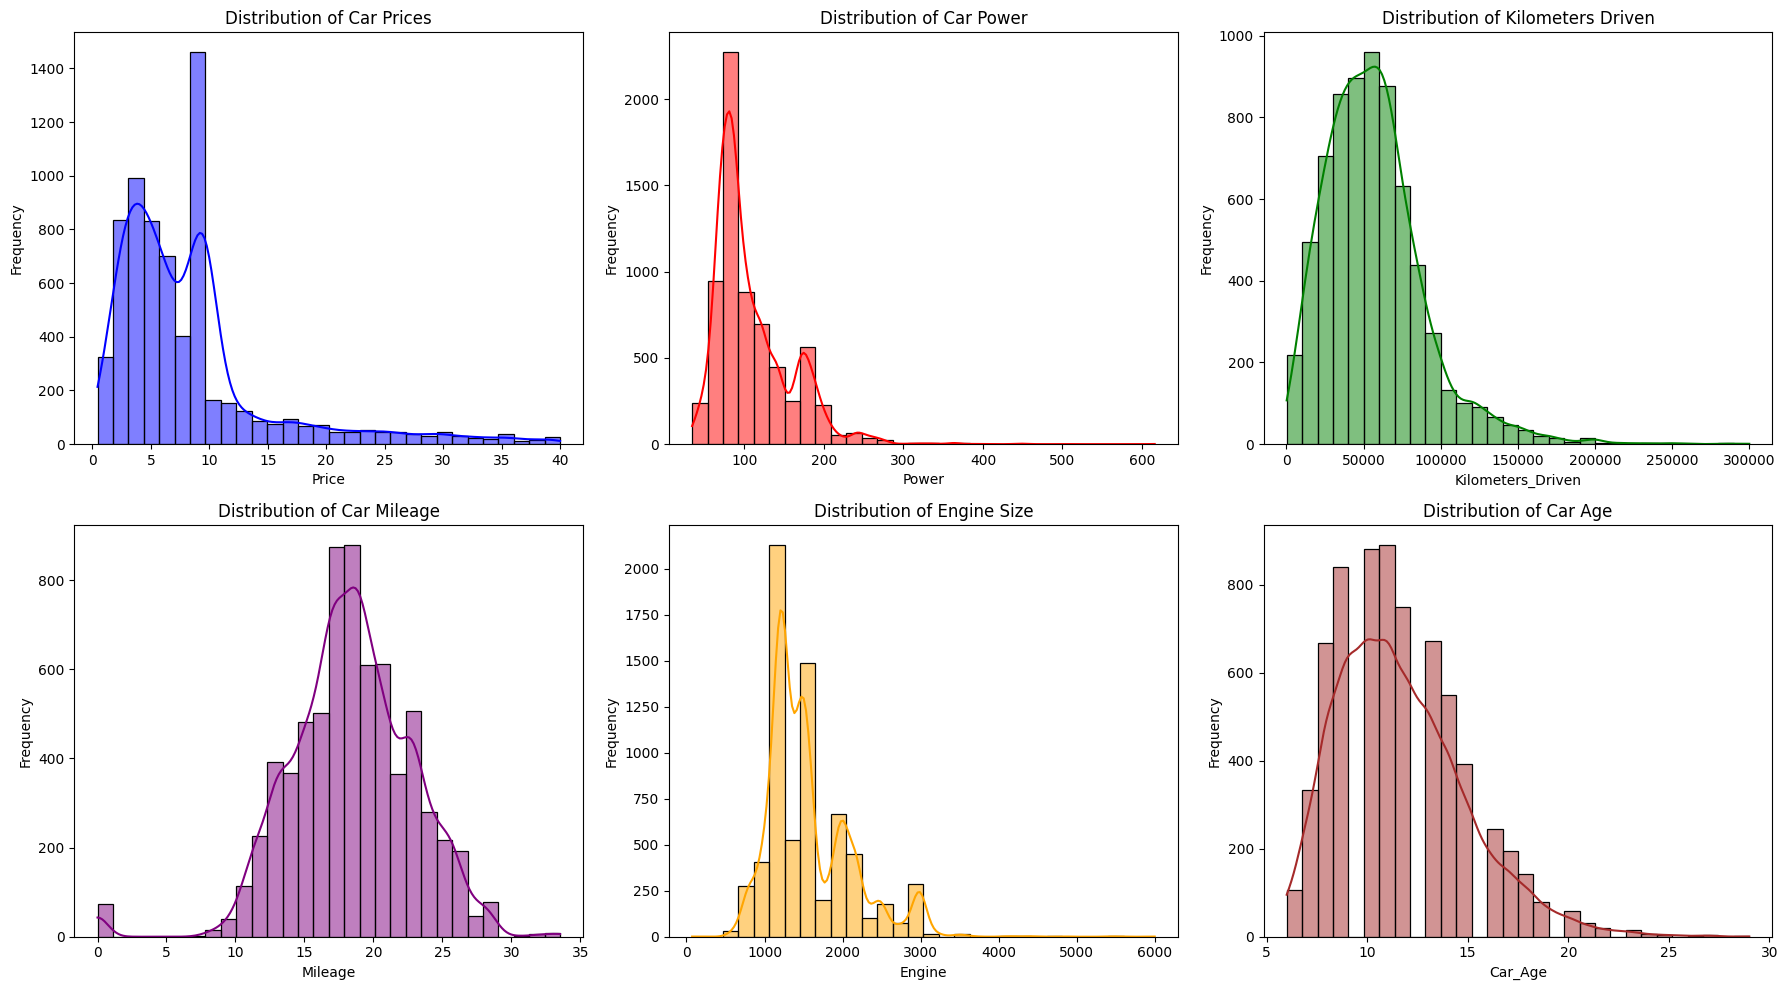

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with six subplots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogram for Price
sns.histplot(data1['Price'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Car Prices")
axes[0, 0].set_xlabel("Price")
axes[0, 0].set_ylabel("Frequency")

# Histogram for Power
sns.histplot(data1['Power'], bins=30, kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Car Power")
axes[0, 1].set_xlabel("Power")
axes[0, 1].set_ylabel("Frequency")

# Histogram for Kilometers Driven
sns.histplot(data1['Kilometers_Driven'], bins=30, kde=True, color='green', ax=axes[0, 2])
axes[0, 2].set_title("Distribution of Kilometers Driven")
axes[0, 2].set_xlabel("Kilometers_Driven")
axes[0, 2].set_ylabel("Frequency")

# Histogram for Mileage
sns.histplot(data1['Mileage'], bins=30, kde=True, color='purple', ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Car Mileage")
axes[1, 0].set_xlabel("Mileage")
axes[1, 0].set_ylabel("Frequency")

# Histogram for Engine
sns.histplot(data1['Engine'], bins=30, kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Engine Size")
axes[1, 1].set_xlabel("Engine")
axes[1, 1].set_ylabel("Frequency")

# Histogram for Car Age
sns.histplot(data1['Car_Age'], bins=30, kde=True, color='brown', ax=axes[1, 2])
axes[1, 2].set_title("Distribution of Car Age")
axes[1, 2].set_xlabel("Car_Age")
axes[1, 2].set_ylabel("Frequency")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


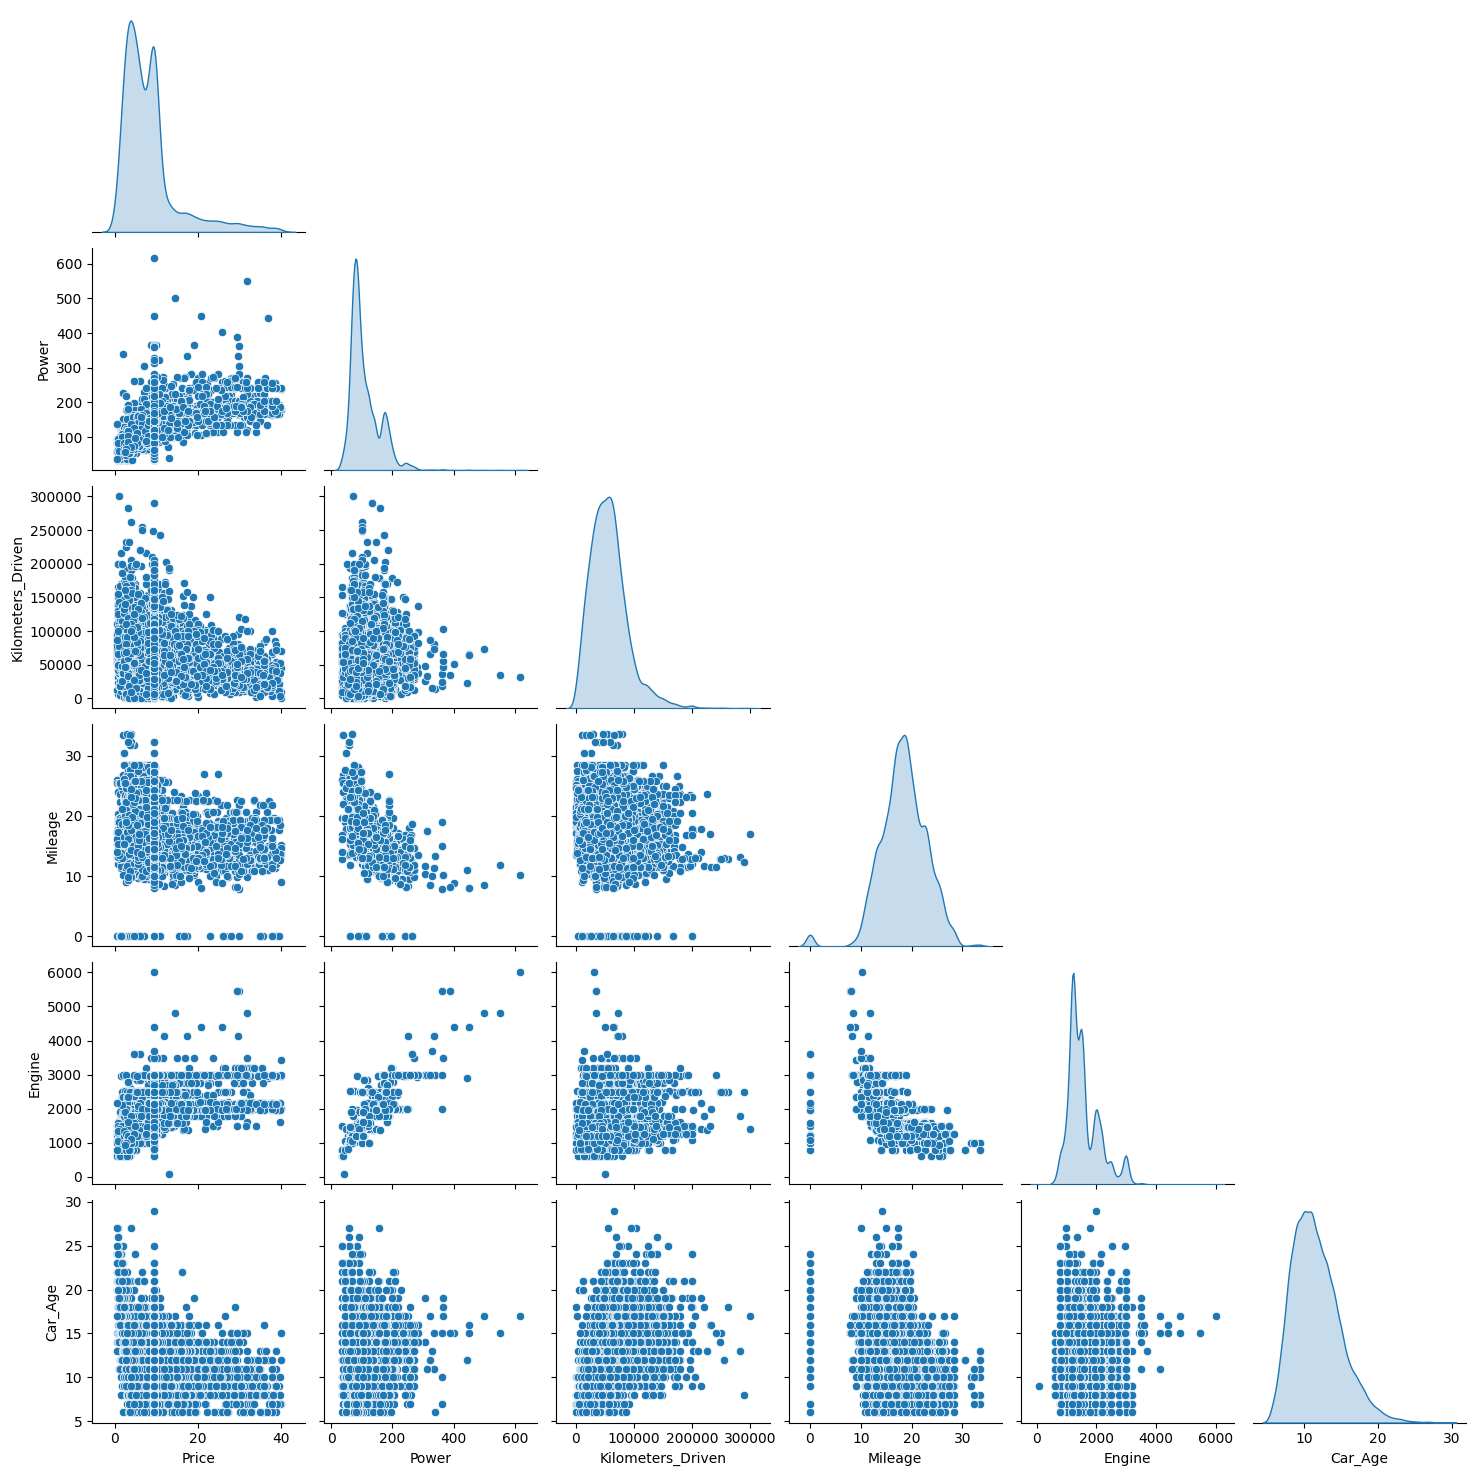

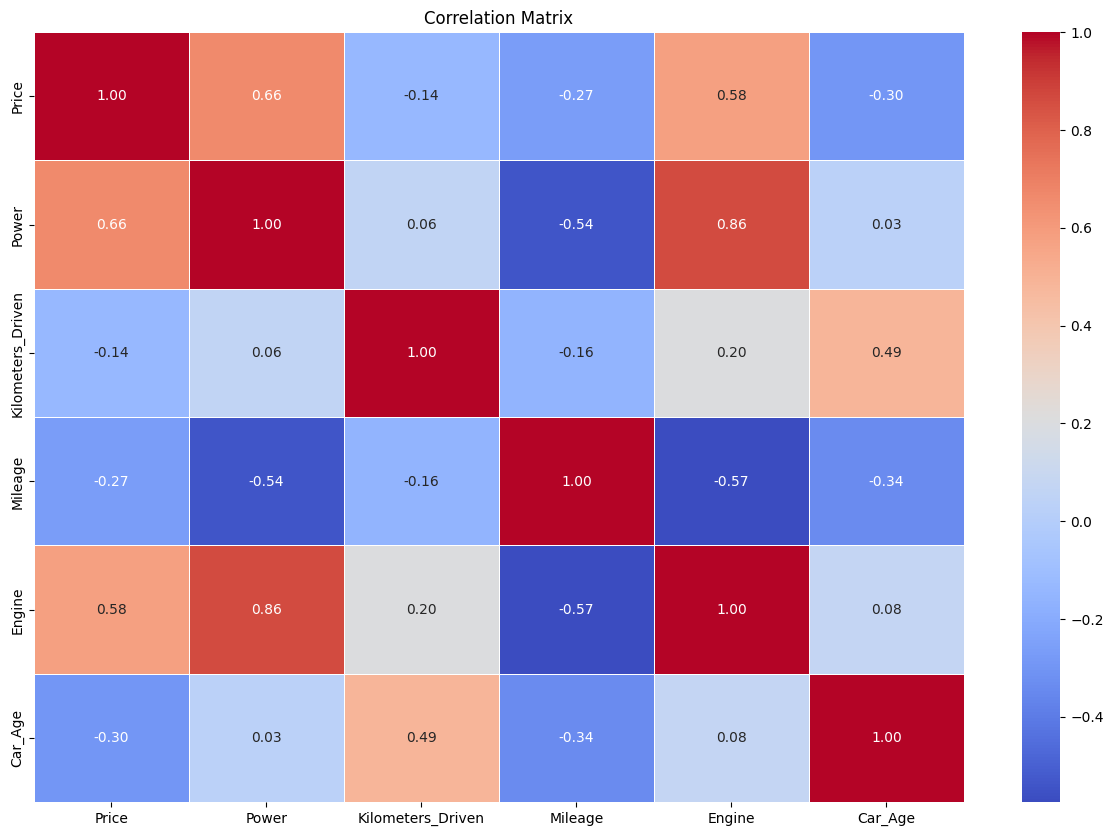

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define columns
columns = ['Price', 'Power', 'Kilometers_Driven', 'Mileage', 'Engine', 'Car_Age']

# Scatter matrix (Pairplot)
sns.pairplot(data1[columns], diag_kind='kde', corner=True)
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data1[columns].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [30]:
data1.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_ZScore,Seats_ZScore,Price_ZScore,Car_Age
count,6894.000000,6894.000000,6892.000000,6849.000000,6723.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000
mean,2013.357412,56919.420946,18.384349,1566.957512,109.277215,5.184218,8.382966,-0.021080,-0.083619,-0.107595,11.642588
std,3.227334,32758.332388,4.490619,544.944678,48.113692,0.711356,6.981645,0.388031,0.831489,0.685080,3.227334
min,1996.000000,171.000000,0.000000,72.000000,34.200000,0.000000,0.440000,-0.693281,-6.143349,-0.887006,6.000000
25%,2011.000000,34109.250000,15.730000,1197.000000,74.000000,5.000000,3.750000,-0.291273,-0.298948,-0.562209,9.000000
50%,2014.000000,53429.000000,18.500000,1461.000000,90.000000,5.000000,6.500000,-0.062425,-0.298948,-0.292363,11.000000
75%,2016.000000,72492.750000,21.140000,1968.000000,136.000000,5.000000,9.479468,0.163390,-0.298948,0.000000,14.000000
max,2019.000000,300000.000000,33.540000,5998.000000,616.000000,7.000000,40.000000,2.858274,2.038812,2.994854,29.000000


**Group Comparasion using box plots and bar charts. **

Price and Car_ Age

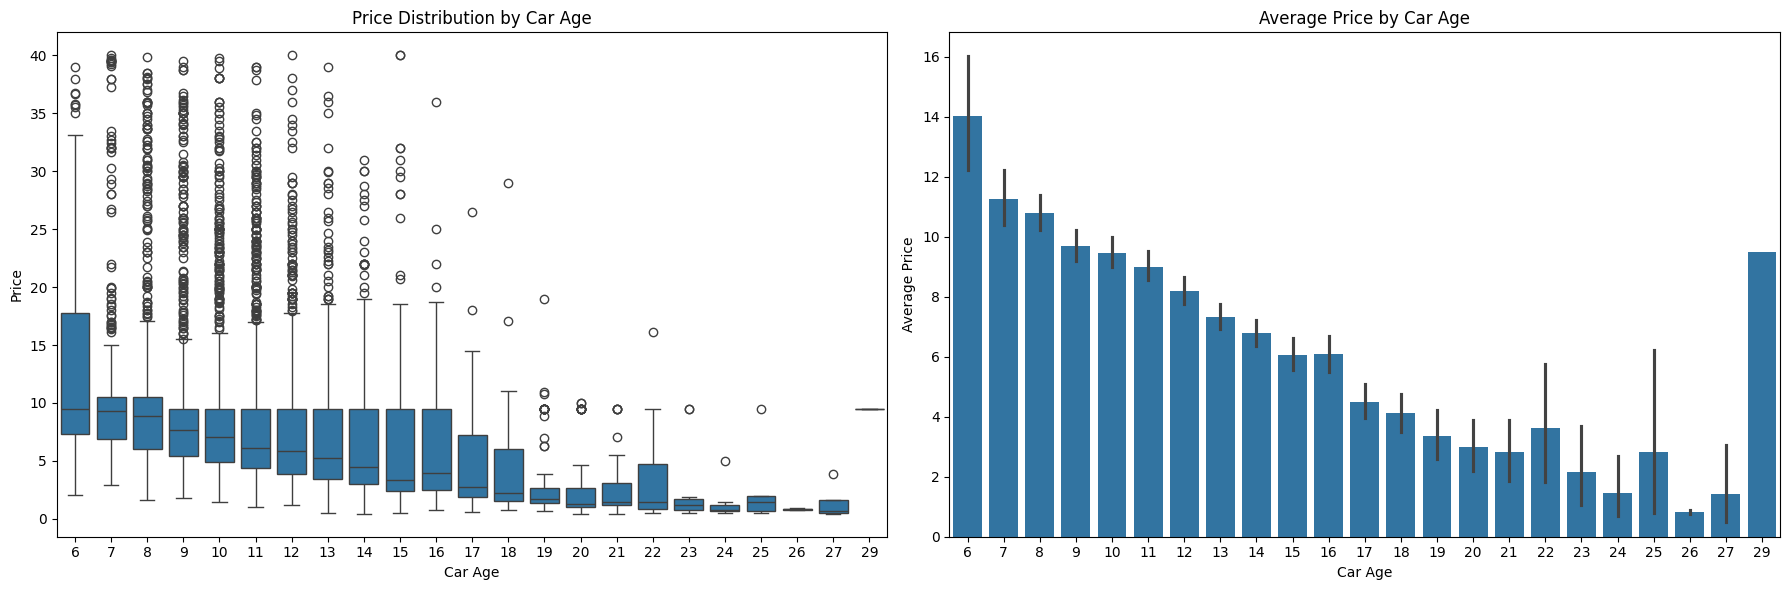

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create  two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Box Plot
sns.boxplot(x=data1['Car_Age'], y=data1['Price'], ax=axes[0])
axes[0].set_title("Price Distribution by Car Age")
axes[0].set_xlabel("Car Age")
axes[0].set_ylabel("Price")

# Bar Chart
sns.barplot(x=data1['Car_Age'], y=data1['Price'], estimator='mean', ax=axes[1])
axes[1].set_title("Average Price by Car Age")
axes[1].set_xlabel("Car Age")
axes[1].set_ylabel("Average Price")

plt.tight_layout()
plt.show()


Price VS Brands

<ipython-input-87-137cdc356e1a>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
<ipython-input-87-137cdc356e1a>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


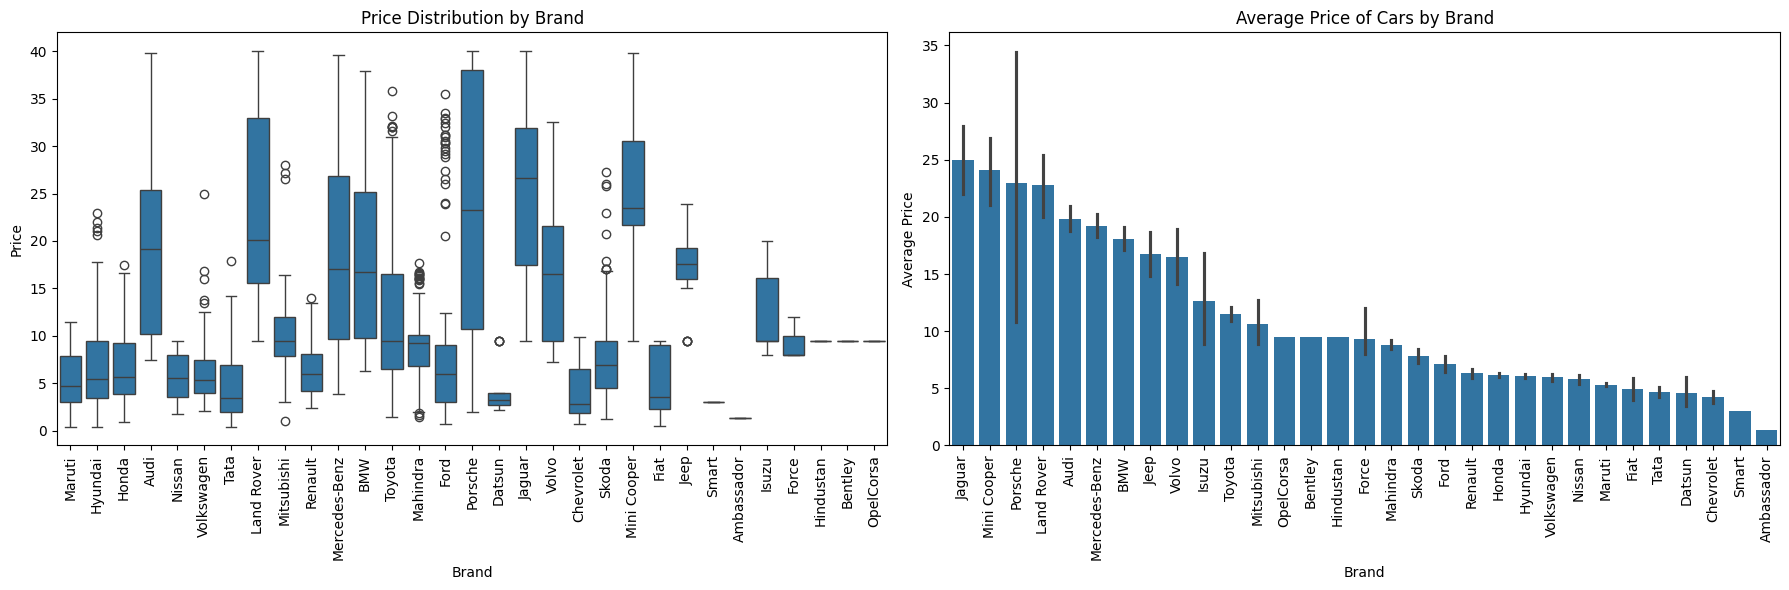

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Price Distribution by Brand
sns.boxplot(x=data1['Brand'], y=data1['Price'], ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Price Distribution by Brand")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Price")

# Bar Chart: Mean Price of Cars by Brand
brand_order = data1.groupby('Brand')['Price'].mean().sort_values(ascending=False).index  # Use mean instead of sum
sns.barplot(x=data1['Brand'], y=data1['Price'], estimator='mean', order=brand_order, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Average Price of Cars by Brand")
axes[1].set_xlabel("Brand")
axes[1].set_ylabel("Average Price")

plt.tight_layout()
plt.show()


**Statistical Inference**

T-Test (Luxury vs. Economy Car Prices)

Hypothesis 1: Luxury car brands (e.g., Mercedes-Benz, BMW, Audi) tend to have significantly higher prices compared to economy brands (e.g., Maruti, Hyundai, Tata).

Null Hypothesis (H₀): There is no significant difference in car prices between luxury and economy brands.

Alternative Hypothesis (H₁): Luxury brands have significantly higher prices than economy brands.


In [ ]:
import pandas as pd
import scipy.stats as stats

# Define luxury and economy brands
luxury_brands = ['Mercedes-Benz', 'BMW', 'Audi', 'Bentley', 'Porsche']
economy_brands = ['Honda', 'Hyundai', 'Mitsubishi', 'Toyota', 'Isuzu', 'Ford','Chevrolet','Fiat']

# Filter luxury price and economy price
luxury_prices = data1.loc[data1['Brand'].apply(lambda x: x in luxury_brands), 'Price']
economy_prices = data1.loc[data1['Brand'].apply(lambda x: x in economy_brands), 'Price']


# Perform T-test
t_stat, p_value = stats.ttest_ind(luxury_prices, economy_prices, equal_var=False)

ttest_results = pd.DataFrame({
    "T-Statistic": [t_stat],
    "P-Value": [p_value],
})

print(ttest_results)


   T-Statistic        P-Value
0    37.367886  1.107924e-191


Results:

T-Statistic: 37.37 → A very high value, indicating a strong difference between luxury and economy car prices.

P-Value: 1.11e-191 → An extremely small value (almost zero), meaning the difference is highly significant.

Since the p-value is far below 0.05, we reject the null hypothesis, confirming that luxury brands have significantly higher prices than economy brands.


**Chi-Square Test**

"Fuel type distribution is independent of car brand. All brands have similar proportions of petrol, diesel, and electric cars."

Null Hypothesis (H₀ - No Relationship):

Alternative Hypothesis (H₁ - There is a Relationship):



In [ ]:
# Chi-Square Test
contingency_table = pd.crosstab(data1['Brand'], data1['Fuel_Type'])
chi2_stat, chi2_p_value = stats.chi2_contingency(contingency_table)[:2]

chi2_results = pd.DataFrame({
    "Chi-Square": [chi2_stat],
    "P-Value": [chi2_p_value]
})
print(chi2_results)

    Chi-Square        P-Value
0  1653.844191  7.812476e-268


Results:

Chi-Square: 1653.84 → Very high value, indicating a strong difference.

P-Value: 7.81e-268 → Extremely small (almost zero), meaning the result is highly significant.

This confirms that fuel type distribution is significantly different across brands.

Some brands sell more petrol cars, while others focus on electric or diesel vehicles.

# **Data Analysis Report**

**1. Introduction**

The dataset analyzed on a collection of used cars, containing details about various car brands, models, pricing, fuel types, transmission types, car_age and other attributes. The objective of this analysis is to determine key patterns in car pricing and fuel type distribution across different brands and to test statistical hypotheses related to luxury and economy car segments.

Dataset Source: https://www.kaggle.com/datasets/sukhmanibedi/cars4u


**2. Data Cleaning & Preprocessing Steps**

The dataset preprocessing steps to ensure accuracy and consistency in analysis:

**Handling Missing Values:**

*   'New_Price' column was dropped due to 86.13% missing values, making it unnecessary
*   'Price' column had 17.01% missing values, which were filled using the mean price.
*   'Seats' column had missing values replaced with 2, assuming a minimum seat count for practical use.
*   Categorical columns ('Mileage', 'Engine', 'Power') were processed by extracting numeric values.


**Outlier Removal:**

The Z-score method was applied to remove extreme values in 'Kilometers_Driven', 'Seats', and 'Price'.

**Feature Engineering:**

The 'Name' column was split into 'Brand' and 'Model' for better analysis.

A new variable 'Car_Age' was derived to understand the impact of vehicle age on pricing.

**3. Exploratory Data Analysis (EDA) Findings**

Key Insights from Data Visualization:

Price Distribution by Brand: Luxury brands such as Mercedes-Benz, BMW, and Audi show significantly higher price distributions compared to economy brands such as Maruti, Hyundai, and Tata.

Total Price by Brand: While luxury brands have higher individual car prices, economy brands contribute to higher total sales value due to higher sales volume.

Price vs. Car Age: As expected, older cars tend to have lower prices, but depreciation varies across brands.

Engine Size vs. Brand: Luxury brands generally have larger engines, while economy brands focus on fuel efficiency.

Fuel Type vs. Brand: Certain brands specialize in diesel or electric vehicles, showing a distinct pattern in fuel type preferences.

**4. Statistical Tests & Results**

**T-Test: Comparing Luxury vs Economy Car Prices**

*   Null Hypothesis (H₀): There is no significant difference in prices between luxury and economy cars
*   Alternative Hypothesis (H₁): Luxury brands have significantly higher prices than economy brands

**Results**

T-Statistic: 37.37 (high value, indicating a strong difference)

P-Value: 1.11e-191 (almost zero, highly significant)

Conclusion: Reject H₀ → Luxury brands have significantly higher prices than economy brands.

**Chi-Square Test: Brand vs. Fuel Type Distribution**

*   Null Hypothesis (H₀): Fuel type distribution is independent of car brand.
*   Alternative Hypothesis (H₁): Fuel type distribution varies significantly by brand.

**Results**

Chi-Square Statistic: 1653.84 (extremely high differences)

P-Value: 7.81e-268 (almost zero, highly significant)

Conclusion: Reject H₀ → Different brands specialize in different fuel types



This report highlights key pricing trends, fuel type distribution, and brand positioning in the used car market. Luxury brands command significantly higher prices, while economy brands contribute more to total sales volume. Statistical tests confirmed that luxury car prices are higher price comapre economic cars, and fuel type distribution varies significantly by brand. These insights provide valuable guidance for buyers and sellers in making informed decisions about vehicle pricing, fuel efficiency, and brand selection.

# **Reflection**

**a. Challenges Encountered and How They Were Overcome**

I have faced several challenges to careful handling. One of the major issues was the presence of missing values in key columns such as ‘New_Price’, which had over 86.13% missing data. I have considered whether I should drop ‘New_Price’. It provided little value to the analysis. For an example , in some case columns is important  such as in medical studies on cancer patients, where symptoms and statistics differ significantly from those of healthy individuals.

Besides, the ‘Price’ column had 17.01% missing values, which were imputed using the mean to maintain dataset integrity. Additionally, the ‘Seats’ column had missing values replaced with 2, assuming a minimum seat count for practical use.
Besides, the ‘Name’, ‘Mileage’, ‘Kilometers_Driven’, and ‘Transmission’ columns contained mixed data. Therefore, I needed to separate the information to make the analysis more efficient. Additionally, a new variable, ‘Car_Age’, was derived to analyze the impact of vehicle age on pricing trends.

Lastly, I needed to apply the right statistical tests based on the type of data I was working with. I used both the T-test, and the Chi-Square test have different purposes. I used the T-test to compare the means of two groups when dealing with numerical data. While chi-square analyze categorical (discrete) data to determine whether two categorical variables were related. Despite these challenges, data preprocessing, handling of missing values, and appropriate statistical techniques helped ensure the reliability of the findings.


**b. Further Questions for Exploration**

To improve data preprocessing, I can apply feature scaling methods like MinMaxScaler and StandardScaler would help standard numerical variables such as price, kilometers driven, and car age, ensuring all features are treated equally in model training. Additionally, ordinal encoding for ordered variables like car condition and one-hot encoding for unordered variables like Brand and Fuel Type, ensuring fair treatment of all features